<a href="https://colab.research.google.com/github/ThanapolKhamhla/Grovers-algorithm/blob/main/Grover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm Training in SCQC2024

In [ ]:
!pip install -U qiskit qiskit[visualization] qiskit-ibm-runtime qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 19.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
  Installing buil

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

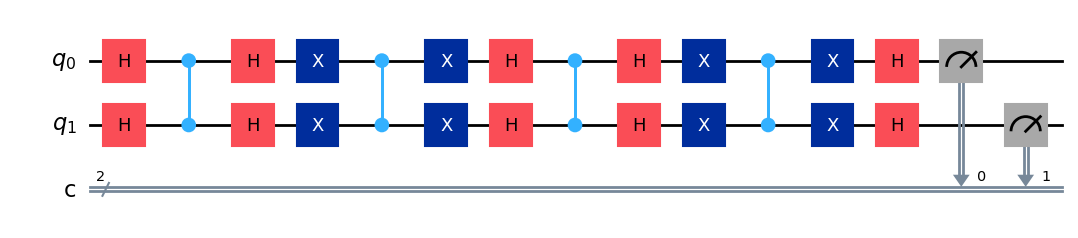

In [ ]:
# Set up the quantum circuit
num_qubits = 2
grover = QuantumCircuit(num_qubits, num_qubits)

# Step 1: Initialization - Apply Hadamard gates to all qubits
for bit in range(num_qubits):
  grover.h(bit)

# Step 2: Build the oracle
def oracle(bits)->list:
  grover.cz(bits[0],bits[1]) #mark |11>

# Step 3: Construct the diffusion operator
def diffuser(bits)->list:
  grover.h([bits[0],bits[1]])
  grover.x([bits[0],bits[1]])
  grover.cz(bits[0],bits[1])
  grover.x([bits[0],bits[1]])
  grover.h([bits[0],bits[1]])

# Step 4: Run the algorithm iteratively
iter = 2
for i in range(iter):
  oracle((0,1))
  diffuser((0,1))

# Step 5: Measure the results
grover.measure([0,1],[0,1])

grover.draw('mpl')

In [ ]:
# execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
print(counts)

{'11': 280, '01': 257, '00': 214, '10': 249}


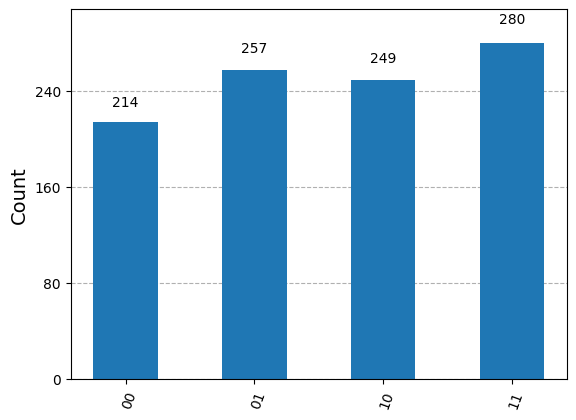

In [ ]:
plot_histogram(counts)

# Challenge Problem
ให้สร้าง Grover's algorithm สำหรับ marked state $|111⟩$

In [ ]:
grover = QuantumCircuit(num_qubits, num_qubits)

# Step 1: Initialization - Apply Hadamard gates to all qubits
def init(bits)->list:
  for bit in range(num_qubits):
    grover.h(bit)

# Step 2: Build the oracle #mark |111>
def oracle(bits, mark)->(list,list):
  if mark == [0,0,0]:
    grover.x([bits[i] for i in range(num_qubits)])
    grover.ccz(bits[0], bits[1], bits[2])
    grover.x([bits[i] for i in range(num_qubits)])
  if mark == [1,1,1]:
    grover.ccz(bits[0], bits[1], bits[2])

# Step 3: Construct the diffusion operator
def diffuser(bits)->list:
  grover.h([bits[i] for i in range(num_qubits)])
  grover.x([bits[i] for i in range(num_qubits)])
  grover.ccz(bits[0], bits[1], bits[2])
  grover.x([bits[i] for i in range(num_qubits)])
  grover.h([bits[i] for i in range(num_qubits)])

# Step 4: Run the algorithm iteratively
def iter_run(iter)->int:
  bits = [i for i in range(num_qubits)]
  for i in range(iter):
    oracle(bits, mark)
    diffuser(bits)

# Step 5: Measure the results
def measure_all(bits)->list:
  grover.measure(bits, bits)


def main():
  init(bits)
  iter_run(iter)
  measure_all(bits)





Mark, [1, 1, 1]


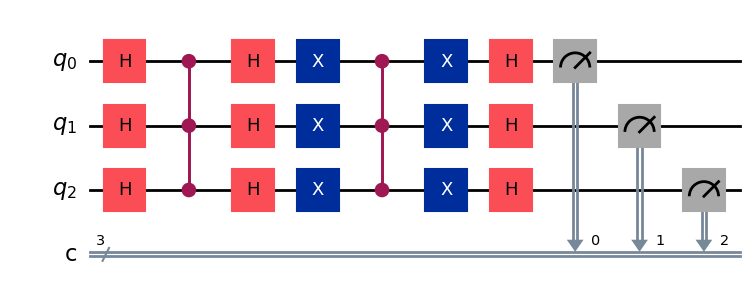

In [ ]:
# Set up the quantum circuit
num_qubits = 3
iter = 1
mark = [1,1,1]

main()
print(f"Mark, {mark}")
grover.draw('mpl')



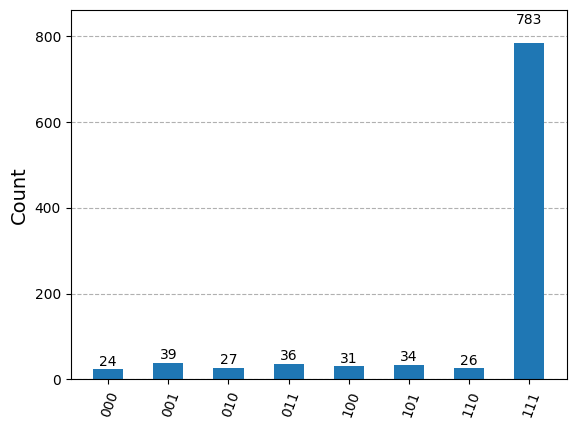

In [ ]:
# execute the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(grover, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()
counts = result.get_counts(grover)
plot_histogram(counts)